### 1.7 Creating Network Visualisation

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data

relationship_df = pd.read_csv('country_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,France,Italy,10
1,Italy,Russia,6
2,Germany,Russia,26
3,Bulgaria,Germany,6
4,Bulgaria,Russia,6
...,...,...,...
75,Greece,Italy,4
76,Italy,Japan,6
77,Romania,Russia,6
78,India,Lebanon,3


In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### NetworkX visualisation

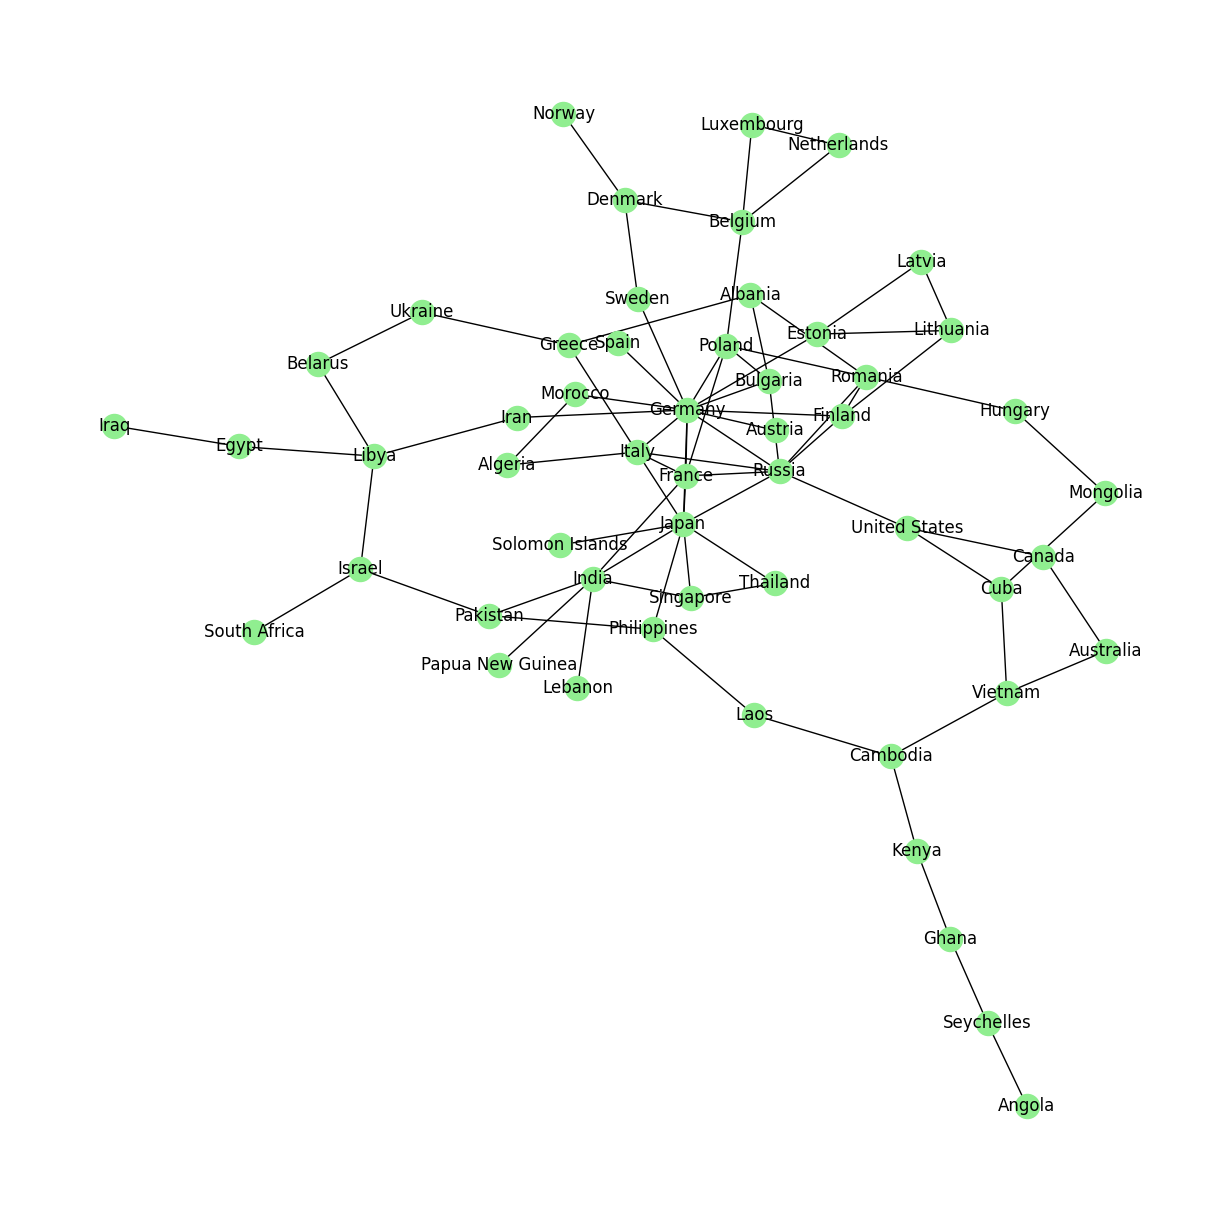

In [12]:
# Create a static network graph using NetworkX

h = plt.figure(figsize = (12,12))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'lightgreen', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [13]:
h.savefig('networkx_20thcentury.png')

#### Pyvis visualisation

In [15]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20thcentury.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


#### Leiden Algorithm

In [17]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [18]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [19]:
new_com = coms.to_node_community_map()

In [20]:
new_com

defaultdict(list,
            {'France': [0],
             'Italy': [0],
             'Russia': [0],
             'Germany': [0],
             'Bulgaria': [0],
             'Austria': [0],
             'Spain': [0],
             'Poland': [0],
             'Finland': [0],
             'Albania': [0],
             'Greece': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Romania': [0],
             'Japan': [1],
             'Thailand': [1],
             'Singapore': [1],
             'Philippines': [1],
             'Solomon Islands': [1],
             'India': [1],
             'Pakistan': [1],
             'Papua New Guinea': [1],
             'Lebanon': [1],
             'Ukraine': [2],
             'Belarus': [2],
             'Libya': [2],
             'Egypt': [2],
             'Iraq': [2],
             'Israel': [2],
             'South Africa': [2],
             'Iran': [2],
             'Hungary': [3],
             'Mongolia': [3],
             'Cu

In [21]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [22]:
dict_com

{'France': 0,
 'Italy': 0,
 'Russia': 0,
 'Germany': 0,
 'Bulgaria': 0,
 'Austria': 0,
 'Spain': 0,
 'Poland': 0,
 'Finland': 0,
 'Albania': 0,
 'Greece': 0,
 'Morocco': 0,
 'Algeria': 0,
 'Romania': 0,
 'Japan': 1,
 'Thailand': 1,
 'Singapore': 1,
 'Philippines': 1,
 'Solomon Islands': 1,
 'India': 1,
 'Pakistan': 1,
 'Papua New Guinea': 1,
 'Lebanon': 1,
 'Ukraine': 2,
 'Belarus': 2,
 'Libya': 2,
 'Egypt': 2,
 'Iraq': 2,
 'Israel': 2,
 'South Africa': 2,
 'Iran': 2,
 'Hungary': 3,
 'Mongolia': 3,
 'Cuba': 3,
 'United States': 3,
 'Canada': 3,
 'Australia': 3,
 'Vietnam': 3,
 'Laos': 4,
 'Cambodia': 4,
 'Kenya': 4,
 'Ghana': 4,
 'Seychelles': 4,
 'Angola': 4,
 'Belgium': 5,
 'Netherlands': 5,
 'Luxembourg': 5,
 'Denmark': 5,
 'Norway': 5,
 'Sweden': 5,
 'Estonia': 6,
 'Latvia': 6,
 'Lithuania': 6}

In [23]:
# Visualise a network graph based on the communities algorithm

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20thcentury_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


##### The partition made with Leiden algorithm does show some relation with the history and key events in the 20th century. The blue group shows country that heavily involved in the World War I, such as Germany, Rurssia, France. Then we have the yellow group which shows the World War II, which involves Japan, Germany, US, and many more. The red group shows the Cold War events in which it involves the US, Vietnam, Cuba, etc. From the graph, we can also see that Germany being the country that has the most relation to other countries, as Germany was involved in a lot of the key events during the 20th century.

#### Visualise the degree, closeness, and betweenness centrality 

In [24]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.11538461538461539,
 'Italy': 0.11538461538461539,
 'Russia': 0.15384615384615385,
 'Germany': 0.25,
 'Bulgaria': 0.07692307692307693,
 'Austria': 0.019230769230769232,
 'Spain': 0.019230769230769232,
 'Poland': 0.09615384615384616,
 'Estonia': 0.057692307692307696,
 'Latvia': 0.038461538461538464,
 'Lithuania': 0.057692307692307696,
 'Finland': 0.07692307692307693,
 'Belgium': 0.07692307692307693,
 'Netherlands': 0.038461538461538464,
 'Luxembourg': 0.038461538461538464,
 'Denmark': 0.057692307692307696,
 'Norway': 0.019230769230769232,
 'Sweden': 0.038461538461538464,
 'Albania': 0.057692307692307696,
 'Greece': 0.057692307692307696,
 'Ukraine': 0.038461538461538464,
 'Belarus': 0.038461538461538464,
 'Libya': 0.07692307692307693,
 'Egypt': 0.038461538461538464,
 'Iraq': 0.019230769230769232,
 'Japan': 0.17307692307692307,
 'Morocco': 0.038461538461538464,
 'Algeria': 0.038461538461538464,
 'Thailand': 0.038461538461538464,
 'Singapore': 0.057692307692307696,
 'Philippine

In [25]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [26]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

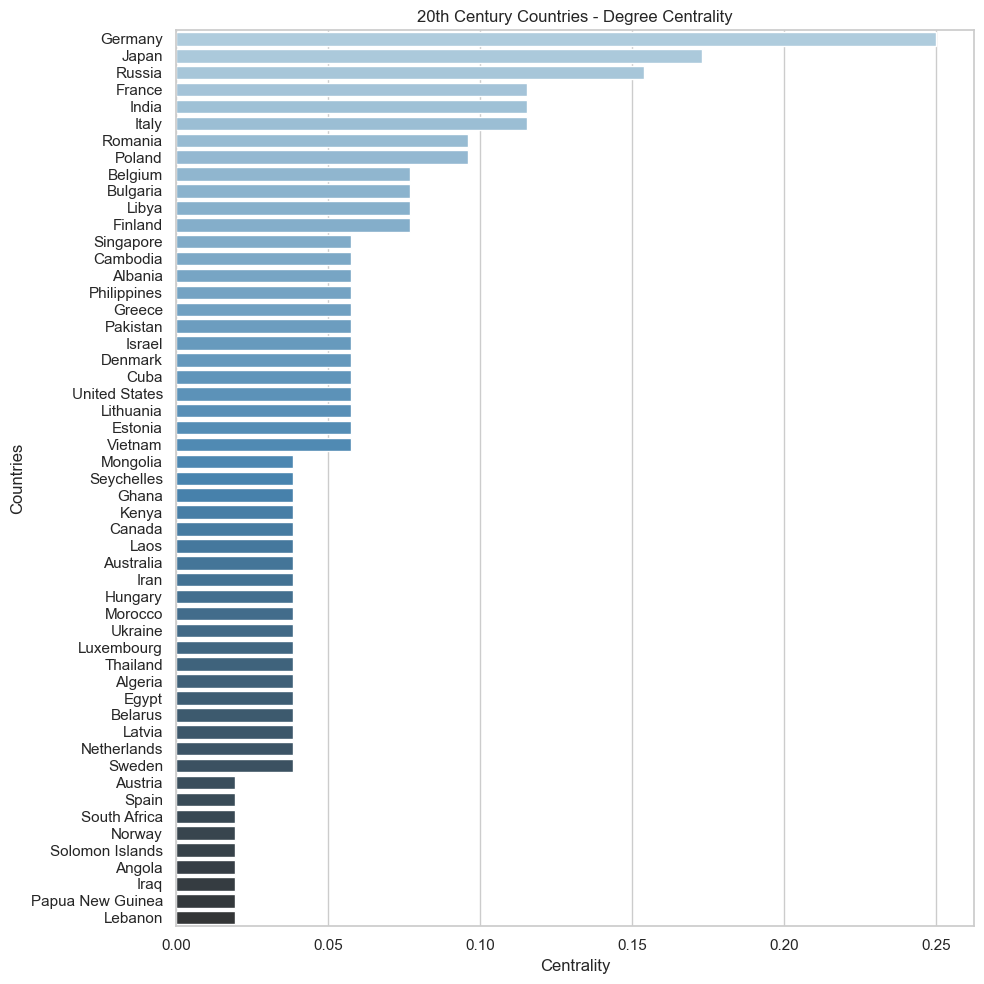

In [35]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
sns.barplot(x="centrality", y="countries", palette="Blues_d", data=degree_df).set_title("20th Century Countries - Degree Centrality")

plt.xlabel('Centrality')
plt.ylabel('Countries')
plt.tight_layout()
plt.show()

In [41]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [42]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

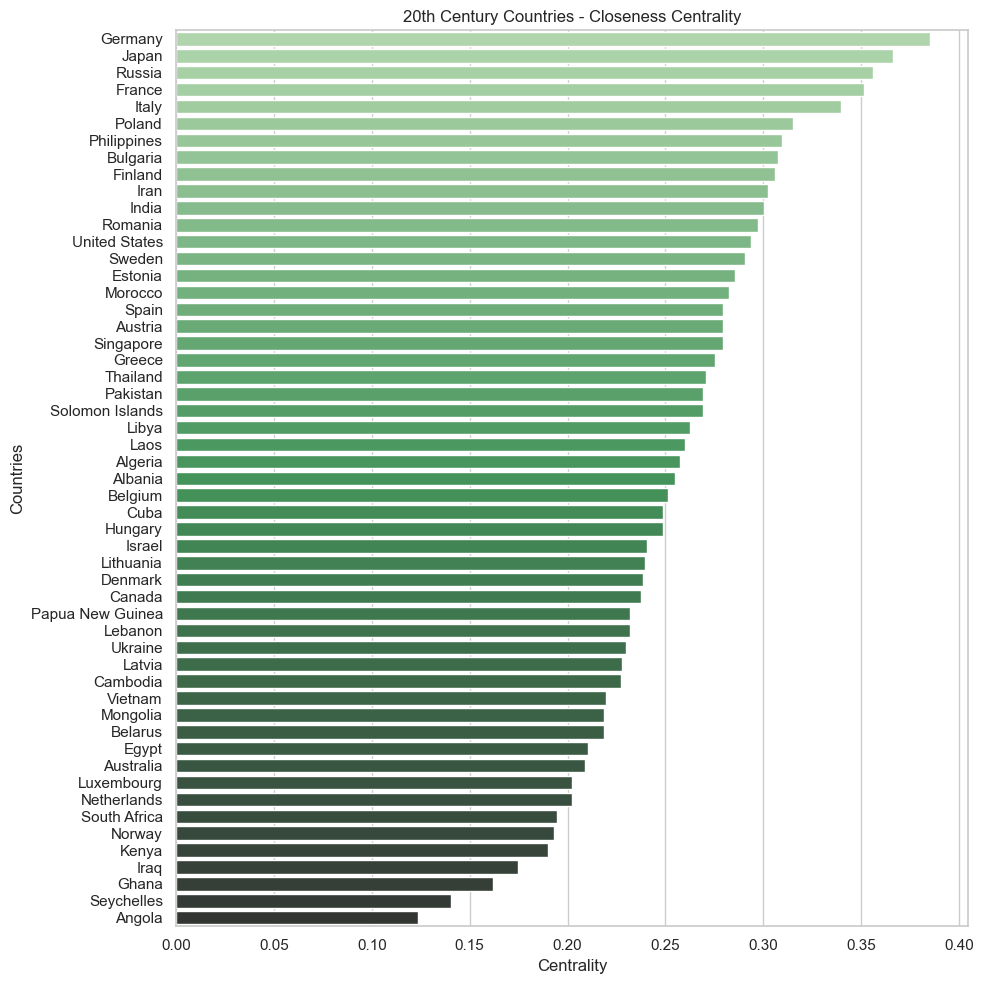

In [43]:
# Plot the degree betweenness

plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
sns.barplot(x="centrality", y="countries", palette="Greens_d", data=closeness_df).set_title("20th Century Countries - Closeness Centrality")

plt.xlabel('Centrality')
plt.ylabel('Countries')
plt.tight_layout()
plt.show()

In [36]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [37]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

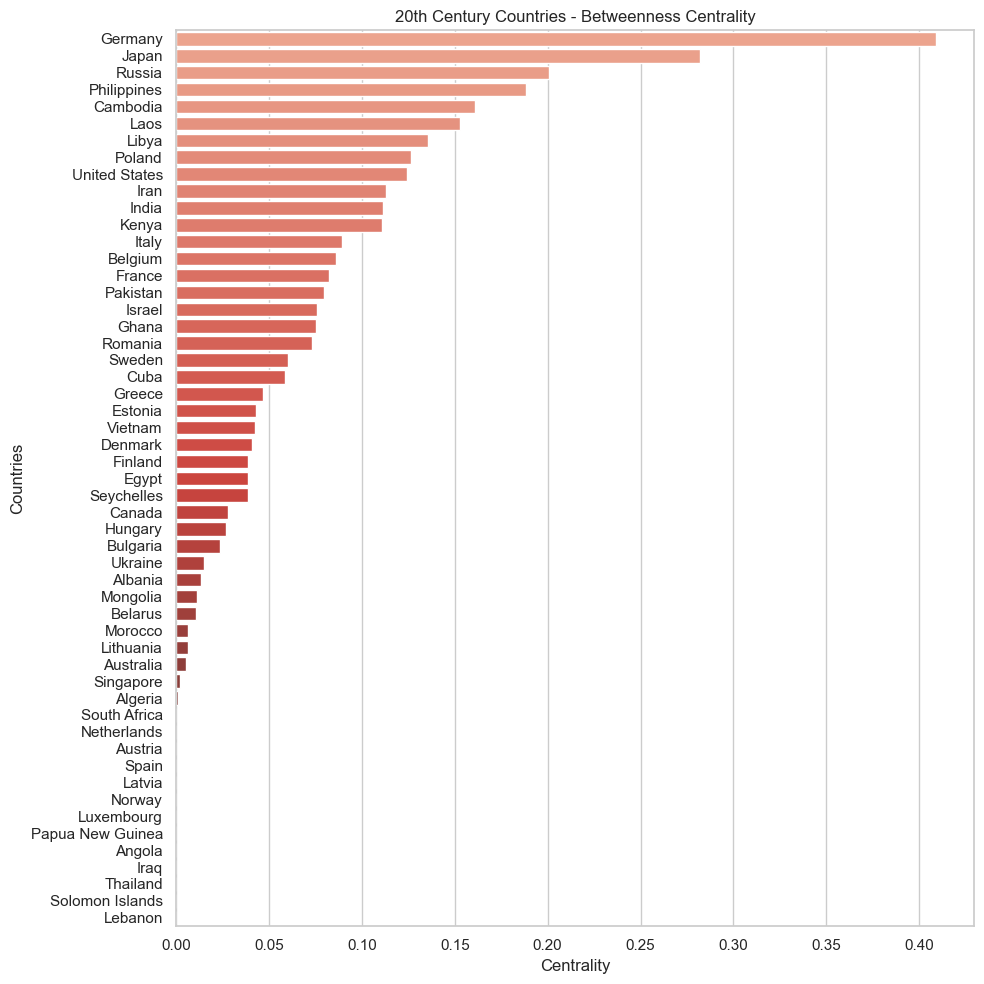

In [39]:
# Plot the degree betweenness

plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
sns.barplot(x="centrality", y="countries", palette="Reds_d", data=betweennes_df).set_title("20th Century Countries - Betweenness Centrality")

plt.xlabel('Centrality')
plt.ylabel('Countries')
plt.tight_layout()
plt.show()

##### All centrality measure observations shows similar result being, Germany, Japan, and Russia as the top 3 countries that was the most influential during the 20th Century Key events.

In [44]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')